The fault-finding exercises permit bringing code and algorithms to your attention that are not explicitly mentioned in the script but are considered sufficiently relevant for this module. Likewise, other exercises of this type may point you to explicit script material for the same reason.

This shows an unseen algorithm, a classic Newton-Raphson root finder method.

The purpose is to open the black-box `SciPy.optimize.curvefit()` <span style="color: red;">function</span> a little and show you what happens behind the scene, albeit in a very simple way. The SciPy code is far more sophisticated (and robust) than this. Nevertheless, this shows fitting with the least squares method. The model function is the `my_func()` function, and the root finder seeks the extremum (zero of the first derivative) of the least squares formula for data with equal weights (all set to 1). 

The least squares target function to minimize for fitting is $$\chi^{2}(g(x_{i};a_{m}))=\sum_{i=1}^{N_{D}}\,\left(\frac{y_{i}-g(x_{i};a_{m})}{\sigma_{i}}\right)^{2}.$$ The $\sigma_{i}$ values are the weights (set to 1 hence they don't show up below). The sum runs over $N_{D}$ data items, with $y_{i}$ the measured data values and $g(x_{i};a_{m})$ the model function, depending on the independent variable values $x_{i}$ and the $m$ free parameters $a_{m}$, where below we use only a single(!) free parameter, the frequency of our artificial data.

We need its first-derivative and a root finder method to find the zero. You can find plenty of literature on the Newton-Raphson method. Here, we use the central difference approximation to differentiation (can only be discrete on a computer) using $$\frac{df}{dx}|_{CD}=\frac{f(x+\delta{}x/2)-f(x-\delta{}x/2)}{\delta{}x},$$ where $\delta{}x$ is a small but finite step value.

The Newton-Raphson method iterates a first-order Taylor expansion of the target function with adjustments of the step size until it converges close enough to a zero to stop the search. Note that it depends heavily on the starting value for its search.

The code below, once repaired, should show the fitting (root finding) fail for a few initial value guesses (see the loop), and show successful fits to the (known) parameter value for initial values close enough to the educated guess. The fastest (fewest number of iterations) converged result is then taken to make the plot, showing the artificial data and the best fit curve.

 Root found , f(root) =  5.601075159233915e-14  , eps =  1e-09 , iterations =  6
root =  4.484917072178687
 Root found , f(root) =  5.601075159233915e-14  , eps =  1e-09 , iterations =  6
root =  4.484917072178687
 Root found , f(root) =  -1.3877787807814457e-14  , eps =  1e-09 , iterations =  6
root =  4.484917072178688
 Root found , f(root) =  -1.3877787807814457e-14  , eps =  1e-09 , iterations =  6
root =  4.484917072178688
 Root found , f(root) =  2.3718804698091844e-12  , eps =  1e-09 , iterations =  5
root =  4.4849170721786535
 Root found , f(root) =  -1.3877787807814457e-14  , eps =  1e-09 , iterations =  5
root =  4.484917072178688
 Root found , f(root) =  -1.3877787807814457e-14  , eps =  1e-09 , iterations =  4
root =  4.484917072178688
 Root found , f(root) =  -1.3877787807814457e-14  , eps =  1e-09 , iterations =  4
root =  4.484917072178688
 Root found , f(root) =  -1.3877787807814457e-14  , eps =  1e-09 , iterations =  5
root =  4.484917072178688
 Root found , f(root) =

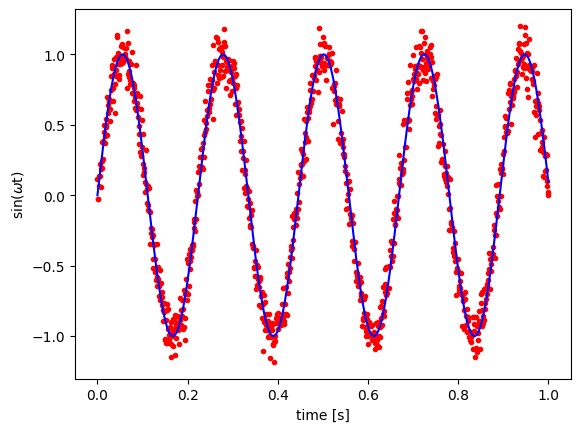

In [2]:
# YOUR CODE HERE

'''
Script:
Demonstrate elementary curve fitting.

This example contains faults.
The plot should show the slightly noisy my_func() curve in red 
for 4.5 Hz for a second and a best fit curve in blue.
'''
import numpy as np
import matplotlib.pyplot as plt

def my_func(t, freq):
    ''' model function, unit amplitude.'''
    return np.sin(2*np.pi*freq * t)

def Newton_Raphson(func, x0, dx, args, eps=1.e-9, Nmax=20):
    ''' Newton-Raphson root finder function. Default precision and maximum number of iterations.'''
    ff = args[0]
    ts = args[1]
    da = args[2]
    for it in range(Nmax + 1):
        F = func(ff, ts, da, x0)
        if ( abs(F) <= eps ): # Converged?
            print ( " Root found , f(root) = ",F, " , eps = ",eps, ", iterations = ",it)
            return x0, it
        df = (func(ff, ts, da, x0+dx/2) - func(ff, ts, da, x0-dx/2))/dx # Central difference
        delta = F / df
        x0 -= delta # New guess
    if it >= Nmax:
        print ( "Newton Failed for Nmax = " , Nmax)
    return x0, it

# def derivative(model, x, data, par):
#     ''' Objective function to solve for fitting.'''
#     return np.sum((data - model(x,par))*np.gradient(model(x,par),x))

def derivative(model, x, data, par):
    g = model(x, par)
    dgdf = x * np.cos(par * x)   # derivative of sin(f t) wrt f
    return -2 * np.sum((data - g) * dgdf)

# artificial data first
par   = 4.5 # [Hz] YR: correct
times = np.linspace(0,1,1000) # [s] YR: correct
data  = my_func(times, par) # noise-free data first, at set frequency

# small amount of noise added, just 10% error
data += np.random.normal(scale=0.1,size=len(data)) # YR: correct

# find the root of the first derivative of the least_square function - extremum
step = 1.e-4 # YR: correct
roots = []
nits  = []
for val in range(-7,7): # YR: range as intended, correct
    p0 = par+0.01*val*par+0.005 # YR: correct, get single figure percent changes only and avoid true value
    root, nit = Newton_Raphson(derivative, p0, step, args=(my_func, times, data))
    print('root = ', root)
    roots.append(root)
    nits.append(nit)
root = roots[np.argmin(nits)] # YR: lowest n iterations, best fit from initial value series, important for test.

# plot data and best fit curve. YR: correct plotting
plt.plot(times,data,'r.') # red
plt.plot(times, my_func(times, root),'b') # blue
plt.xlabel('time [s]')
plt.ylabel('sin($\omega$t)')
plt.show()


